In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('mbti_1.csv')

print(df.head())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


In [4]:
# Nodes by features
from itertools import combinations
import networkx as nx

# Empty graph
G = nx.Graph()

# 8 features of MBTI as nodes
mbti_traits = ['I', 'E', 'S', 'N', 'T', 'F', 'J', 'P']
G.add_nodes_from(mbti_traits)

# Calculate the frequency of simultaneous occurrence of characteristic dimensions
for mbti in df['type']:
    chars = list(mbti.strip())
    for pair in combinations(chars, 2):
        if G.has_edge(*pair):
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(pair[0], pair[1], weight=1)

# Check edges & weights
for u, v, w in G.edges(data=True):
    print(f"{u}-{v}: {w['weight']}")


I-N: 5697
I-F: 3739
I-J: 2932
I-T: 2937
I-P: 3744
I-S: 979
E-N: 1781
E-T: 1044
E-P: 1497
E-J: 502
E-F: 955
E-S: 218
S-F: 527
S-P: 745
S-T: 670
S-J: 452
N-F: 4167
N-J: 2982
N-T: 3311
N-P: 4496
T-P: 2415
T-J: 1566
F-J: 1868
F-P: 2826


In [5]:
# PageRank
pagerank_scores = nx.pagerank(G, weight='weight')

# Results
sorted_scores = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)
print("\nPageRank Scores:")
for dimension, score in sorted_scores:
    print(f"{dimension}: {score:.4f}")



PageRank Scores:
N: 0.2020
I: 0.1826
P: 0.1477
F: 0.1331
T: 0.1169
J: 0.1023
E: 0.0674
S: 0.0480


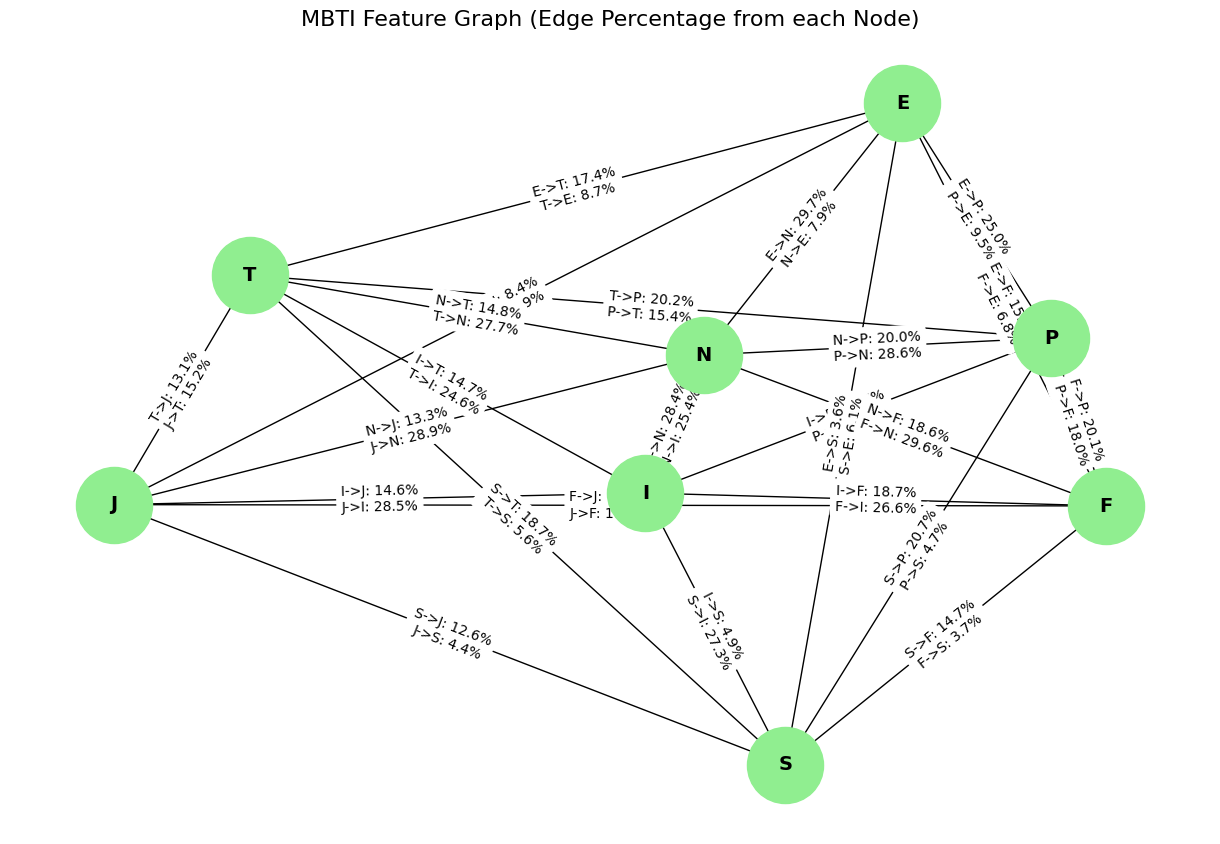

In [6]:
import matplotlib.pyplot as plt

# Figure layout
pos = nx.spring_layout(G, seed=42, k=0.5)

# Calculate the sum of edge weights going out from each node
node_totals = {}
for u, v, data in G.edges(data=True):
    node_totals[u] = node_totals.get(u, 0) + data['weight']
    node_totals[v] = node_totals.get(v, 0) + data['weight']

edge_labels_percentage = {}
for u, v, data in G.edges(data=True):
    # Since the current graph is undirected, calculate both nodes in the direction
    percent_u = (data['weight'] / node_totals[u]) * 100
    percent_v = (data['weight'] / node_totals[v]) * 100
    # Show % in both directions
    edge_labels_percentage[(u, v)] = f"{u}->{v}: {percent_u:.1f}%\n{v}->{u}: {percent_v:.1f}%"

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=14, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_percentage, font_size=10)

plt.title("MBTI Feature Graph (Edge Percentage from each Node)", fontsize=16)
plt.show()

In [7]:
def get_pagerank_vector(mbti_type, pagerank_dict):
    return [pagerank_dict[t] for t in mbti_type]

df['pagerank_vector'] = df['type'].apply(lambda x: get_pagerank_vector(x, pagerank_scores))
print(df['pagerank_vector'])

0       [0.1825909847169731, 0.20200778734792124, 0.13...
1       [0.06740901528302692, 0.20200778734792124, 0.1...
2       [0.1825909847169731, 0.20200778734792124, 0.11...
3       [0.1825909847169731, 0.20200778734792124, 0.11...
4       [0.06740901528302692, 0.20200778734792124, 0.1...
                              ...                        
8670    [0.1825909847169731, 0.04799221265207875, 0.13...
8671    [0.06740901528302692, 0.20200778734792124, 0.1...
8672    [0.1825909847169731, 0.20200778734792124, 0.11...
8673    [0.1825909847169731, 0.20200778734792124, 0.13...
8674    [0.1825909847169731, 0.20200778734792124, 0.13...
Name: pagerank_vector, Length: 8675, dtype: object


In [8]:
# Nodes by trait co-occurrence
import numpy as np

traits = ['I', 'E', 'N', 'S', 'T', 'F', 'J', 'P']
trait_index = {t: i for i, t in enumerate(traits)}
co_matrix = np.zeros((8, 8))

# Count the number of times traits co-occur
for mbti in df['type']:
    chars = list(mbti)
    for t1 in chars:
        for t2 in chars:
            if t1 != t2:
                i, j = trait_index[t1], trait_index[t2]
                co_matrix[i][j] += 1

row_sums = co_matrix.sum(axis=1, keepdims=True)
transition_matrix = co_matrix / row_sums
print(transition_matrix)


[[0.         0.         0.28445177 0.04888157 0.1466447  0.18668864
  0.14639505 0.18693829]
 [0.         0.         0.29698182 0.03635151 0.17408704 0.15924629
  0.08370852 0.24962481]
 [0.25394491 0.07938843 0.         0.         0.14758848 0.18574485
  0.13292324 0.20041009]
 [0.27262601 0.06070732 0.         0.         0.18657755 0.14675578
  0.12587023 0.2074631 ]
 [0.24591811 0.08741522 0.27723353 0.05609981 0.         0.
  0.13112283 0.2022105 ]
 [0.26551626 0.06781707 0.29590967 0.03742366 0.         0.
  0.13265161 0.20068172]
 [0.28460493 0.0487284  0.28945836 0.04387498 0.15200932 0.18132401
  0.         0.        ]
 [0.2381225  0.09521084 0.28595052 0.04738281 0.15359664 0.17973669
  0.         0.        ]]


In [9]:
def get_transition_vector(mbti_type, transition_matrix, traits=traits):
    idx = {t: i for i, t in enumerate(traits)}
    vec = np.zeros(len(traits))
    for t in mbti_type:
        vec += transition_matrix[idx[t]]
    return vec / len(mbti_type)  # trung bình vector

df['transition_vector'] = df['type'].apply(lambda x: get_transition_vector(x, transition_matrix))
print(df['transition_vector'])

0       [0.20101652450769703, 0.04898347549230296, 0.2...
1       [0.1844963779472834, 0.06550362205271656, 0.21...
2       [0.1844963779472834, 0.06550362205271656, 0.21...
3       [0.19611698679088774, 0.053883013209112256, 0....
4       [0.19611698679088774, 0.053883013209112256, 0....
                              ...                        
8670    [0.19406619176741452, 0.055933808232585466, 0....
8671    [0.1893959156640927, 0.06060408433590728, 0.21...
8672    [0.1844963779472834, 0.06550362205271656, 0.21...
8673    [0.1893959156640927, 0.06060408433590728, 0.21...
8674    [0.1893959156640927, 0.06060408433590728, 0.21...
Name: transition_vector, Length: 8675, dtype: object


In [10]:
# Subgraph for each MBTI axis, Instead of using 1 graph, create 4 graphs corresponding to each axis
mbti_axes = [('I', 'E'), ('N', 'S'), ('T', 'F'), ('J', 'P')]
axis_graphs = {f"{a[0]}{a[1]}": nx.DiGraph() for a in mbti_axes}

for axis in mbti_axes:
    axis_graphs[f"{axis[0]}{axis[1]}"].add_nodes_from(axis)

In [11]:
for mbti in df['type']:
    for axis in mbti_axes:
        # Nếu người dùng có trait đó → tạo cạnh trait → trait khác trục
        traits_in_mbti = set(mbti)
        for t1 in axis:
            if t1 in traits_in_mbti:
                for other_axis in mbti_axes:
                    if other_axis == axis:
                        continue
                    for t2 in other_axis:
                        if t2 in traits_in_mbti:
                            axis_graphs[f"{axis[0]}{axis[1]}"].add_edge(t1, t2)


In [12]:
axis_pageranks = {
    axis: nx.pagerank(graph)
    for axis, graph in axis_graphs.items()
}
def extract_axis_vector(mbti_type, axis_pageranks):
    v = []
    for axis in mbti_axes:
        trait = next(t for t in axis if t in mbti_type)
        v.append(axis_pageranks[f"{axis[0]}{axis[1]}"][trait])
    return v

df['axis_pagerank_vector'] = df['type'].apply(lambda x: extract_axis_vector(x, axis_pageranks))
print(df['axis_pagerank_vector'])

0       [0.10309287459263212, 0.10309287459263212, 0.1...
1       [0.10309287459263212, 0.10309287459263212, 0.1...
2       [0.10309287459263212, 0.10309287459263212, 0.1...
3       [0.10309287459263212, 0.10309287459263212, 0.1...
4       [0.10309287459263212, 0.10309287459263212, 0.1...
                              ...                        
8670    [0.10309287459263212, 0.10309287459263212, 0.1...
8671    [0.10309287459263212, 0.10309287459263212, 0.1...
8672    [0.10309287459263212, 0.10309287459263212, 0.1...
8673    [0.10309287459263212, 0.10309287459263212, 0.1...
8674    [0.10309287459263212, 0.10309287459263212, 0.1...
Name: axis_pagerank_vector, Length: 8675, dtype: object


Option 2:

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from collections import Counter

trait_groups = {trait: [] for trait in mbti_traits}

# Group posts by trait
for i, row in df.iterrows():
    for t in row['type']:
        trait_groups[t].append(row['posts'])

# Extract top TF-IDF keywords per trait
top_k = 20  # Number of keywords per trait
trait_keywords = {}

for trait, posts in trait_groups.items():
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf = vectorizer.fit_transform(posts)
    mean_scores = tfidf.mean(axis=0).A1
    vocab = vectorizer.get_feature_names_out()

    top_indices = mean_scores.argsort()[::-1][:top_k]
    top_words = [vocab[i] for i in top_indices]
    trait_keywords[trait] = top_words

print(trait_keywords)

{'I': ['like', 'just', 'don', 'think', 'people', 've', 'know', 'really', 'com', 'time', 'http', 'www', 'youtube', 'watch', 'feel', 'love', 'things', 'infp', 'good', 'say'], 'E': ['like', 'just', 'think', 'don', 'people', 'know', 'really', 've', 'enfp', 'com', 'time', 'entp', 'love', 'feel', 'type', 'good', 'say', 'things', 'http', 'want'], 'S': ['like', 'just', 'don', 'think', 'people', 'really', 've', 'com', 'know', 'time', 'www', 'youtube', 'watch', 'http', 'type', 'things', 'https', 'good', 'feel', 'istp'], 'N': ['like', 'just', 'don', 'think', 'people', 've', 'know', 'really', 'com', 'time', 'http', 'feel', 'www', 'youtube', 'watch', 'love', 'things', 'good', 'say', 'infp'], 'T': ['like', 'just', 'don', 'people', 'think', 'know', 've', 'com', 'really', 'time', 'http', 'intj', 'www', 'watch', 'intp', 'youtube', 'say', 'good', 'things', 'type'], 'F': ['like', 'just', 'think', 'don', 'people', 've', 'really', 'know', 'com', 'feel', 'time', 'love', 'youtube', 'www', 'infp', 'http', 'wa

In [18]:
custom_stopwords = set([
    'like', 'just', 'don', 'com', 'http', 'www', 'youtube', 'watch', 'infp', 
    'intj', 'infj', 'intp', 'enfp', 'entp', 'type', 'https', 've', 'istp'
])

def clean_tokenizer(text):
    tokens = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
    return [t for t in tokens if t not in custom_stopwords]

trait_keywords_new = {}
top_k = 20

for trait, posts in trait_groups.items():
    vectorizer = TfidfVectorizer(
        tokenizer=clean_tokenizer, 
        stop_words='english',
        max_features=1000
    )
    tfidf = vectorizer.fit_transform(posts)
    mean_scores = tfidf.mean(axis=0).A1
    vocab = vectorizer.get_feature_names_out()

    top_indices = mean_scores.argsort()[::-1][:top_k]
    top_words = [vocab[i] for i in top_indices]
    trait_keywords_new[trait] = top_words

print(trait_keywords_new) 

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'I': ['think', 'people', 'know', 'really', 'time', 'feel', 'love', 'things', 'good', 'say', 'want', 'way', 'lot', 'life', 'make', 'thing', 'actually', 'yes', 'pretty', 'person'], 'E': ['think', 'people', 'know', 'really', 'time', 'love', 'feel', 'good', 'say', 'things', 'want', 'way', 'lot', 'lol', 'make', 'friends', 'thing', 'life', 'actually', 'yes'], 'S': ['think', 'people', 'really', 'know', 'time', 'things', 'good', 'feel', 'love', 'say', 'want', 'isfp', 'way', 'lot', 'istj', 'isfj', 'pretty', 'make', 'lol', 'friends'], 'N': ['think', 'people', 'know', 'really', 'time', 'feel', 'love', 'things', 'good', 'say', 'want', 'way', 'lot', 'life', 'make', 'thing', 'actually', 'yes', 'friends', 'person'], 'T': ['people', 'think', 'know', 'really', 'time', 'say', 'good', 'things', 'want', 'way', 'feel', 'love', 'make', 'lot', 'actually', 'life', 'thing', 'pretty', 'yes', 'going'], 'F': ['think', 'people', 'really', 'know', 'feel', 'time', 'love', 'things', 'good', 'want', 'say', 'way', 'lo

In [19]:
def count_trait_words(text, trait_keywords):
    words = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
    word_counts = Counter(words)
    trait_counts = []
    for trait in traits:
        keywords = trait_keywords[trait]
        count = sum(word_counts.get(w, 0) for w in keywords)
        trait_counts.append(count)
    return trait_counts  # 8D vector


In [20]:
co_matrix = np.zeros((8, 8))
trait_index = {t: i for i, t in enumerate(traits)}

for mbti in df['type']:
    chars = list(mbti)
    for t1 in chars:
        for t2 in chars:
            if t1 != t2:
                i, j = trait_index[t1], trait_index[t2]
                co_matrix[i][j] += 1

row_sums = co_matrix.sum(axis=1, keepdims=True)
transition_matrix = co_matrix / row_sums


In [21]:
def trait_vector_from_text(text, trait_keywords, transition_matrix):
    base_vector = np.array(count_trait_words(text, trait_keywords))
    if base_vector.sum() == 0:
        return np.zeros(8)
    base_vector = base_vector / base_vector.sum()  # normalize
    return np.dot(base_vector, transition_matrix)  # mapping over graph


In [22]:
df['trait_vector'] = df['posts'].apply(
    lambda x: trait_vector_from_text(x, trait_keywords, transition_matrix)
)

print(df[['type', 'trait_vector']].head())


   type                                       trait_vector
0  INFJ  [0.20565136741119003, 0.057783431536573955, 0....
1  ENTP  [0.1918397202142961, 0.054287646394998196, 0.2...
2  INTP  [0.1977199066847521, 0.056334147369301965, 0.2...
3  INTJ  [0.1940598358972785, 0.05514651330907072, 0.21...
4  ENTJ  [0.19559968716621856, 0.05543642887877849, 0.2...
